This notebook is to build the models for Hou et al 2011 and model based on discussions with supervisors which is based on a more bottom up aproach compared to traditional OGMs. 

In [1]:
## imports
import Functions as F
import scipy as sc

# Hou et al 2011 Model
 The Hou et al 2011 model needs to be rearranged so as it can be used for my purposes.  I need to express the model in terms of $\frac{dm}{dt}$.
## Rearranging in  term of $\frac{dm}{dt}$
Hou et al. state that:
\begin{align}
    E_m \frac{dm}{dt} = B_0 m^\frac{3}{4} - B_m m 
\end{align}
where:
- $E_m$ : the amount of metabolic energy required to synthesize one unit of biomass
- $B_0$ : Taxon specific constant = $b_0 e^{-\frac{E_0}{KT}}$ (Boltzmann-Arrhenius equation)
- $B_m$ : mass specific metabolic rate = $B_0 M^{-\frac{1}{4}}$


When trying to calculate feeding restricted growth (FR) for a proportion of *ad libitum* growth $\beta$:
\begin{align}
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] = f B_{0, FR}m_{FR}(t)^\frac{3}{4} + E_c \frac{dm_{FR}(t)}{dt} \\
    \beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4} &=  E_c \frac{dm_{FR}(t)}{dt}\\
        \frac{\beta [(f + \frac{E_c}{E_m}) B_0 m(t)^{\frac{3}{4}} - \frac{E_c}{E_m} B_0 M^{- \frac{1}{4}} m(t)] - f B_{0, FR}m_{FR}(t)^\frac{3}{4}}{E_c} &=  \frac{dm_{FR}(t)}{dt}\\
\end{align}

Where:
- $E_c$ : the combustion energy of a cell

To calculate $m(t)$ to insert into the above equation:
\begin{align}
   m(t) &= (1 - [1 - (\frac{m_0}{M})^\frac{1}{4}] e^{-\frac{B_{0t}}{4 E_m M^\frac{1}{4}}})^4 M\\
\end{align}

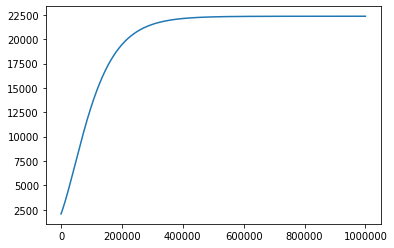

[  2063.           2063.08644663   2063.17289486 ...,  22369.73625476
  22369.7362561   22369.73625745]


In [28]:
# a section to test functions and other functionality
#dog
m0 = 2063
time = 10**6
params = {"beta":0.75, "f":1.8, "Ec":24000, "Em":4185, "B0":3.92, "B0FR":3.92 * 1.04,  "M":34805}
mass = F.hou_integrate(m0=m0, time=time, params=params)[:,0] # using mice from hou et al 2011
# may want to define B0 and B0FR based on b0 and calculate in function?
F.plot_hou(m0, time, params)
print(mass)

# Bottom Up Supply Model
A bottom up supply model that uses a functional response scaled by an allocation constraint to define the gain term.

## Simplified Model
\begin{align}
    \frac{1}{m} \frac{dm}{dt} &= Gain - Loss \\
    \frac{1}{m} \frac{dm}{dt} &= \epsilon f(\cdot) - (L_B + L_R) \\
\end{align}
where:
- $\epsilon$ : allocation constraint (efficiency of conversion from food to energy), dimensionless
- $mf\cdot$ : consumption (intake) rate, mass\time
- $L_B$ : Maintenance cost ($\propto$ Resting metabolic rate),  \rate (mass specific)
- $L_R$ : reproductive cost, rate (mass specific)

## Functional Response
\begin{align}
    f(\cdot) &= \frac{a R(t)}{1 + ahR(t)} \\
\end{align}
where:
- $a$ : Search rate, area or volume/time
- $R(t)$ :  Resource Density at time t, mass/area (time dependent)
- $h$ : Handling time

\begin{align}
    f(\cdot)_{lim_{R \to \infty}} &= \frac{1}{h} \\
     \text{at } \textit{ad libitum} \text{ resource availibility} & \text{ consumption is limited by handling time}\\
\end{align}

## Gain
Gain should scale with $m^\frac{3}{4}$
- to accomplish this it needs to be multiplied by $m^{-\frac{1}{4}}$ to accomadate for when m is multiplied through for all LHS terms in dmdt.

## Loss 
Loss, for the moment at least is assumed to scale isometrically. So no manipulation like in gain is needed.

It seems RMR is reported in energy/mass/time e.g. $J/g/h$.
- For my purposes it need to be a rate (/time) so as when $m$ is multiplied through it yields mass/time.  
## Data
-  resting metabolic rate (RMR) = 2.2 $J/g/h$ (Grantner 1998, refered to as SMR)

### Testing

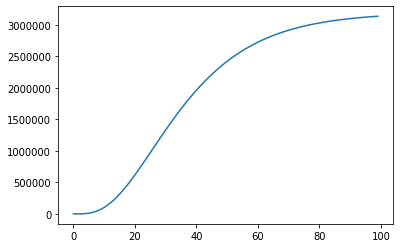

[  1.00000000e-01   5.68296514e+01   5.37368246e+02   2.10743525e+03
   5.55611497e+03   1.16740341e+04   2.11770738e+04   3.46627192e+04
   5.25893418e+04   7.52711655e+04   1.02883565e+05   1.35474781e+05
   1.72981238e+05   2.15244478e+05   2.62028353e+05   3.13035556e+05
   3.67922942e+05   4.26315304e+05   4.87817468e+05   5.52024665e+05
   6.18531249e+05   6.86937859e+05   7.56857161e+05   8.27918314e+05
   8.99770330e+05   9.72084465e+05   1.04455579e+06   1.11690406e+06
   1.18887406e+06   1.26023542e+06   1.33078211e+06   1.40033164e+06
   1.46872404e+06   1.53582071e+06   1.60150308e+06   1.66567134e+06
   1.72824301e+06   1.78915157e+06   1.84834514e+06   1.90578510e+06
   1.96144486e+06   2.01530864e+06   2.06737028e+06   2.11763220e+06
   2.16610439e+06   2.21280343e+06   2.25775165e+06   2.30097635e+06
   2.34250902e+06   2.38238472e+06   2.42064146e+06   2.45731964e+06
   2.49246159e+06   2.52611109e+06   2.55831303e+06   2.58911300e+06
   2.61855703e+06   2.64669132e+06

In [3]:
params = {"epsilon" : 1, "L_B" : 2.15/10, "L_R" : 0, "a" : 1, "R" : 100, "h" : 0.1} # L_B as B0 from hou
m0 = 0.1
time = 10**2

mass = F.plot_supply(m0, time, params)


print(mass)




